In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [112]:
inmuebles_bogota_bd = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/inmuebles_bogota.csv')

In [113]:
inmuebles_bogota_bd.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


La base de datos cuenta con los siguientes datos: tipo, descripción, número de habitaciones, número de baños, área (m2), barrio, UPZ y valor del inmueble.

In [114]:
inmuebles_bogota_bd.shape

(9520, 8)

Contamos con un total de 9 528 de filas (apartamentos) y 8 columnas (tipo de información de cada apartamento).

In [115]:
inmuebles_bogota_bd.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

Observamos el título de cada columna y nos encontramos con la columna "Baños" y "Área", que pueden traer conflictos por el tipo de codificación.

In [116]:
inmuebles_bogota_columnas = {'Baños' : 'Banos', 'Área' : 'Area'}
inmuebles_bogota_bd = inmuebles_bogota_bd.rename(columns = inmuebles_bogota_columnas)
inmuebles_bogota_bd.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
4289,Apartamento,Apartamento en venta en Santa Barbara,2,2,81,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000
253,Apartamento,Apartamento en venta en Usaquén,3,2,71,Usaquén,Usaquén,$ 350.000.000
1218,Apartamento,Apartamento en venta en Suba,3,3,125,Suba,Suba,$ 920.000.000
7812,Casa,Casa en venta en Engativa,3,1,90,Engativa,Engativá,$ 320.000.000
6290,Apartamento,Apartamento en venta en Usaquén,2,2,60,Usaquén,Usaquén,$ 422.000.000


Realizamos el cambio de nombre de la columna "Baños" por "Banos" y de "Área" por "Area" para facilitar el análisis.

In [117]:
inmuebles_bogota_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Analizamos nuestra base de datos:
- Contamos con un total de 9520 entradas.
- Las columnas "Tipo", "Descripcion", "Habitaciones", "Banos", "Area", "Barrio" y "Valor" no contienen valores nulos; mientras que la columna "UPZ" presenta 42 valores nulos.
- Las columnas "Tipo", "Descripcion", "Barrio", "UPZ" y "Valor" son de tipo texto; mientras que las columnas "Habitaciones", "Banos", "Area" son de tipo entero.

In [118]:
inmuebles_bogota_bd.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

Analizamos los datos del índice 300.

In [119]:
round(inmuebles_bogota_bd.Area.mean(),2)

146.66

Nuestra base de datos registra inmuebles con un área media de 146.66 m2

In [120]:
sum(inmuebles_bogota_bd.Barrio == "Chico Reservado")

225

Observamos que los inmuebles que encontramos en el barrio "Chico Reservado" suman un total de 225.

In [121]:
barrio_ChicoReservado = inmuebles_bogota_bd[inmuebles_bogota_bd.Barrio == "Chico Reservado"]
barrio_ChicoReservado.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1745,Apartamento,Apartamento en venta en Chico Reservado,2,3,173,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.550.000.000
3133,Apartamento,Apartamento en venta en Chico Reservado,2,2,92,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 980.000.000
8099,Apartamento,Apartamento en venta en Chico Reservado,1,1,37,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 308.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
2580,Apartamento,Apartamento en venta en Chico Reservado,3,4,184,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.200.000.000


Creamos un nuevo dataframe a partir de los inmuebles que se encuentran en el barrio "Chico Reservado".

In [122]:
round(barrio_ChicoReservado.Area.mean(),2)

142.79

Los inmuebles pertenecientes al barrio "Chico Reservado" cuentan con un área media de 142.79 m2.

In [123]:
len(inmuebles_bogota_bd.Barrio.value_counts())

149

Nuestra base de datos cuenta con un total de 149 barrios.

In [124]:
inmuebles_bogota_bd.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

El barrio "Usaquén" alberga la mayor cantidad de inmuebles.

<Axes: title={'center': 'Número de inmuebles registrados por barrio'}, xlabel='Barrio', ylabel='Nro inmuebles'>

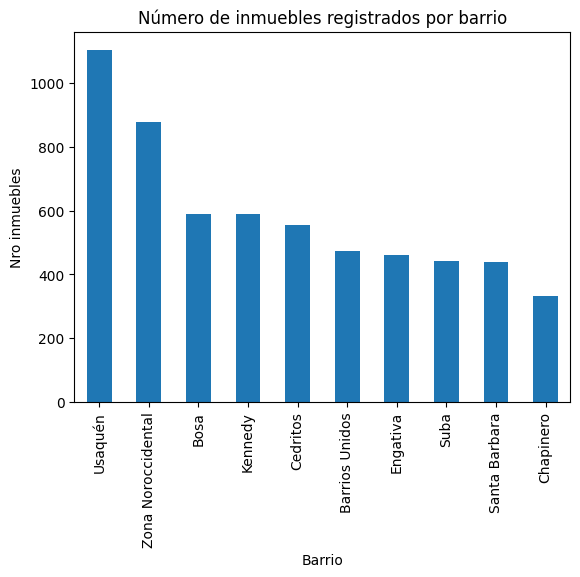

In [125]:
inmuebles_bogota_barrio = inmuebles_bogota_bd.Barrio.value_counts()
inmuebles_bogota_barrio.head(10).plot.bar(title = "Número de inmuebles registrados por barrio", xlabel = "Barrio", ylabel = "Nro inmuebles")

In [126]:
inmuebles_bogota_bd.groupby("Barrio")["Area"].mean().sort_values(ascending=False).head(10)

Barrio
Modelia                  4316.750000
Libertador                642.000000
Bosa Piamonte             400.000000
La Soledad                378.625000
Restrepo                  336.500000
Santa Librada             328.000000
Las Ferias                320.000000
Santa Ana                 309.375000
Veraguas                  302.666667
Bellavista Occidental     286.200000
Name: Area, dtype: float64

Se muestran los 10 barrios que cuentan con inmuebles con la mayor área promedio.

In [127]:
inmuebles_bogota_bd["Tipo de moneda"] = inmuebles_bogota_bd.Valor.str.split(expand = True)[0]
inmuebles_bogota_bd["Precio"] = inmuebles_bogota_bd.Valor.str.split(expand = True)[1]
inmuebles_bogota_bd["Precio"] = inmuebles_bogota_bd["Precio"].str.replace(".", "", regex = True)
inmuebles_bogota_bd["Precio_Millon"] = inmuebles_bogota_bd["Precio"].astype("float")/1000000
inmuebles_bogota_bd.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Tipo de moneda,Precio,Precio_Millon
5432,Apartamento,Apartamento en venta en Bosa,3,2,57,Bosa,Bosa Central,$ 145.000.000,$,145000000,145.0
4580,Casa,Casa en venta en Pasadena,3,3,161,Pasadena,NaN,$ 950.000.000,$,950000000,950.0
1763,Apartamento,Apartamento en venta en Usaquén,2,3,91,Usaquén,Usaquén,$ 365.000.000,$,365000000,365.0


Al tratarse la columna "Valor" de un String, se procede a separar su valor numérico para poder trabajarlo con mayor facilidad.

In [128]:
inmuebles_bogota_bd.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


Respecto a todos nuestros datos sobre inmuebles en Bogotá, observamos que en promedio estos cuentan con 3 habitaciones, 2 baños y un área de 146 m2. Así mismo, el número mínimo de habitaciones es 1, de baños es 0 y de área es 2 m2; mientras que el número máximo de habitaciones por inmueble es 110, de baños es 9 y área es 166 243 m2.

<Axes: title={'center': 'Histograma de precios de inmuebles'}, ylabel='Frequency'>

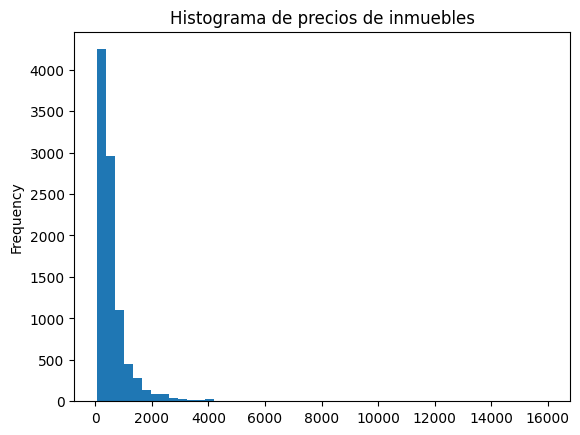

In [129]:
inmuebles_bogota_bd["Precio_Millon"].plot.hist(bins=50, title="Histograma de precios de inmuebles")

Se observa, a grandes rasgos que la distribución de los precios de los inmuebles estudiados se encuentra en su mayoría entre 0 y 2000 millones de pesos colombianos.

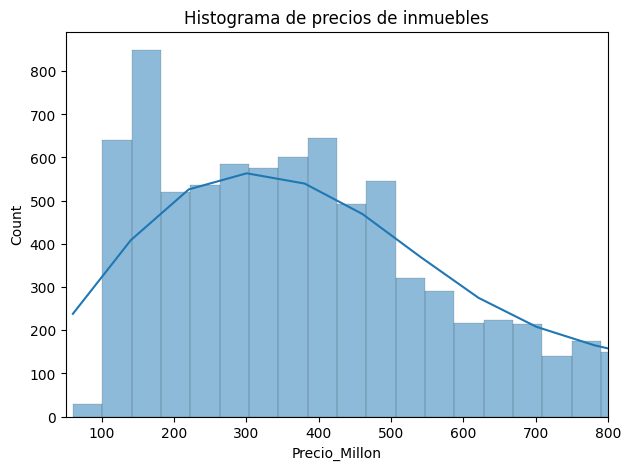

In [130]:
plt.figure(figsize = (7,5))
sns.histplot(data = inmuebles_bogota_bd, x = "Precio_Millon", kde = True).set_title("Histograma de precios de inmuebles")
plt.xlim(50,800)
plt.show()

De acuerdo a nuestro análisis estadístico, sabemos que el 25% de nuestros inmuebles tienen un precio menor a 60 millones de pesos colombianor, mientras que el 75% tiene un precio menor a 680 millones de pesos colombianos. A partir de estos datos, armamos un histograma para observar más a detalle esta distribución.

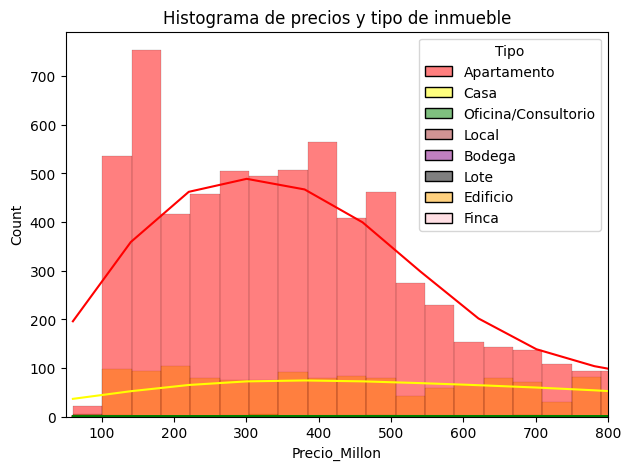

In [131]:
plt.figure(figsize = (7,5))
colores_tipo_inmueble = {"Apartamento":"red", "Casa":"yellow","Oficina/Consultorio":"green", "Edificio":"orange", "Lote":"black", "Bodega":"purple", "Local":"brown", "Finca":"pink"}
sns.histplot(data = inmuebles_bogota_bd, x = "Precio_Millon", kde = True, hue = "Tipo", palette = colores_tipo_inmueble).set_title("Histograma de precios y tipo de inmueble")
plt.xlim(50,800)
plt.show()

En el histograma de precios y tipo de inmueble observamos que en el rango estudiado (50 - 800 millones de pesos colombianos) existe una mayor presencia de apartamentos y casas.

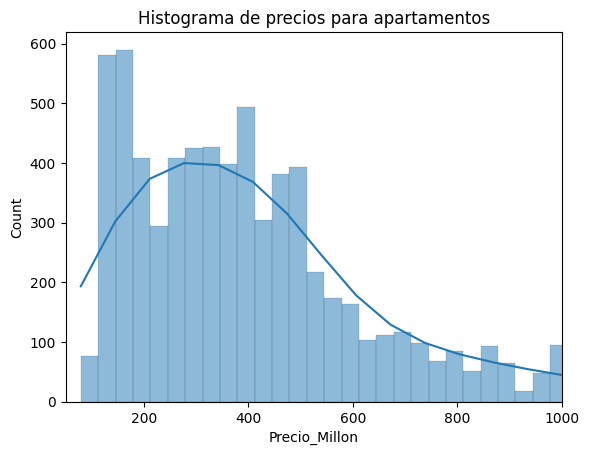

In [132]:
inmuebles_bogota_tipo_apartamento = inmuebles_bogota_bd.query("Tipo == 'Apartamento'")
sns.histplot(data = inmuebles_bogota_tipo_apartamento, x = "Precio_Millon", kde = True).set_title("Histograma de precios para apartamentos")
plt.xlim(50,1000)
plt.show()

En el histograma visto se aprecia más a detalle la distribución de apartamentos por precio.

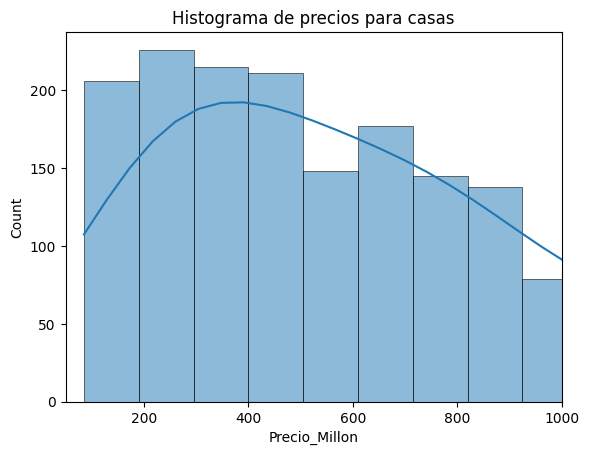

In [133]:
inmuebles_bogota_tipo_casa = inmuebles_bogota_bd.query("Tipo == 'Casa'")
sns.histplot(data = inmuebles_bogota_tipo_casa, x = "Precio_Millon", kde = True).set_title("Histograma de precios para casas")
plt.xlim(50,1000)
plt.show()

En el histograma visto se aprecia más a detalle la distribución de casas por precio.

In [134]:
inmuebles_bogota_bd["Precio_Millon/m2"] = round(inmuebles_bogota_bd.Precio_Millon / inmuebles_bogota_bd.Area,3)
inmuebles_bogota_bd.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Tipo de moneda,Precio,Precio_Millon,Precio_Millon/m2
4764,Casa,Casa en venta en Nicolas De Federman,5,4,340,Nicolas De Federman,Teusaquillo,$ 2.095.000.064,$,2095000064,2095.000064,6.162
3663,Apartamento,Apartamento en venta en Chico Norte,3,3,100,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 480.000.000,$,480000000,480.000000,4.800
1623,Apartamento,Apartamento en venta en Chapinero Central,1,1,32,Chapinero Central,Localidad Chapinero resto,$ 255.000.000,$,255000000,255.000000,7.969


Agregamos una nueva columna para poder evaluar el precio en millones de pesos colombianos por m2 de cada inmueble evaluado.

In [135]:
inmuebles_precio_m2_barrio = inmuebles_bogota_bd.groupby("Barrio")["Precio_Millon/m2"].mean().sort_values(ascending=False)
inmuebles_precio_m2_barrio

Barrio
El Virrey        10.201833
Santa Ana         9.363875
La Merced         8.977000
Chico Norte       8.537750
Los Rosales       8.173770
                   ...    
Santa Librada     1.952000
Las Ferias        1.719000
Libertador        1.662000
Roma              1.346000
Bosa Piamonte     1.175000
Name: Precio_Millon/m2, Length: 149, dtype: float64

Ahora observamos los promedios de precio/m2 por barrio, encontrando que el mayor precio por m2 se encuentra en el barrio "El Virrey", mientras que el menor precio por m2 se encuentra en el barrio "Bosa Piamonte.

In [136]:
df_precio_m2_barrio = pd.DataFrame({'Barrio': inmuebles_precio_m2_barrio.index, 'Precio_Millon/m2': inmuebles_precio_m2_barrio.values})
df_precio_m2_barrio

,Barrio,Precio_Millon/m2
0,El Virrey,10.201833
1,Santa Ana,9.363875
2,La Merced,8.977000
3,Chico Norte,8.537750
4,Los Rosales,8.173770
...,...,...
144,Santa Librada,1.952000
145,Las Ferias,1.719000
146,Libertador,1.662000
147,Roma,1.346000


Ahora tenemos un dataframe con el precio promedio por m2 de cada barrio.

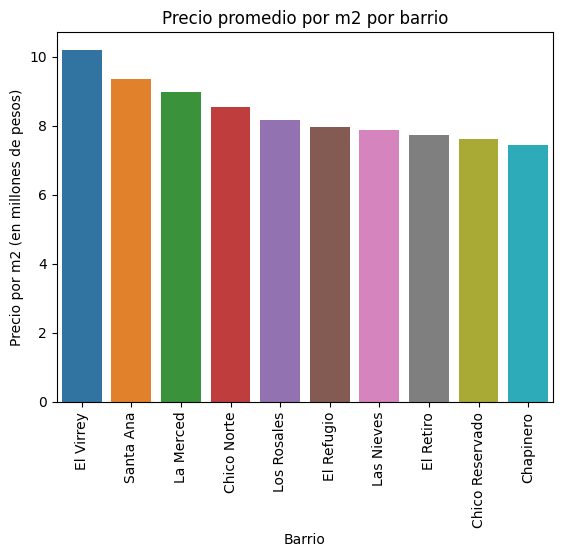

In [137]:
sns.barplot(data = df_precio_m2_barrio.head(10), x = "Barrio", y = "Precio_Millon/m2").set_title("Precio promedio por m2 por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio por m2 (en millones de pesos)")
plt.xticks(rotation = 90)
plt.show()

Ahora vemos el top 10 de los barrios con mayor precio por m2.

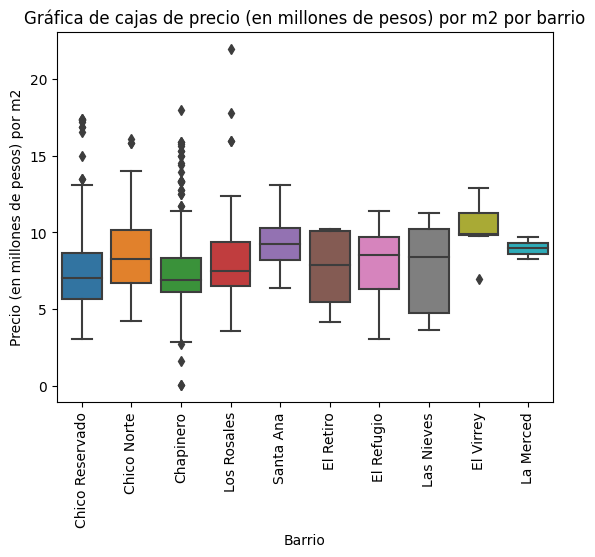

In [138]:
barrios_top10 = df_precio_m2_barrio.head(10).Barrio
sns.boxplot(data = inmuebles_bogota_bd.query("Barrio in @barrios_top10"), x = "Barrio", y = "Precio_Millon/m2").set_title("Gráfica de cajas de precio (en millones de pesos) por m2 por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio (en millones de pesos) por m2")
plt.xticks(rotation = 90)
plt.show()


En el boxplot podemos ver cómo se distribuyen el precio (en millones de pesos colombianos) por m2 por cada barrio. Siendo La Merced el barrio con los precios más homogéneos y Las Nieves los que presentan una mayor variabilidad.

Ahora vamos a traer datos estadísticos de la ciudad de Bogotá, directamente del DANE y vamos a ver como estos datos nos ayudarían en inclusión de nuevas variables para el cálculo del precio de los inmuebles en la ciudad de Bogotá.

Encuesta Multiproposito de Bogotá para obtener información socio-económica y de entorno urbano de los habitantes de Bogotá para la formulación, seguimiento y evaluación de las políticas distritales.

https://microdatos.dane.gov.co/index.php/catalog/743

In [139]:
datos_a = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Identificacion_capitulo_A.csv', encoding = 'latin-1', sep = ";")
datos_a = datos_a.loc[datos_a.MPIO == 11001]
datos_b = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Datos de la vivenda y su entorno (Capítulo B).csv', encoding = 'latin-1', sep = ";")
datos_c = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Condiciones habitacionales del hogar (Capítulo C).csv', encoding = 'latin-1', sep = ";")
datos_e = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Composición del hogar y demografía (Capítulo E).csv', encoding = 'latin-1', sep = ";")
datos_h = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Educación (Capítulo H).csv', encoding = 'latin-1', sep = ";")
datos_l = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', encoding = 'latin-1', sep = ";")

<ipython-input-139-ad48f9740591>:4: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Condiciones habitacionales del hogar (Capítulo C).csv', encoding = 'latin-1', sep = ";")
<ipython-input-139-ad48f9740591>:5: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Composición del hogar y demografía (Capítulo E).csv', encoding = 'latin-1', sep = ";")
<ipython-input-139-ad48f9740591>:6: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/Educación (Capítulo H).csv', encoding = 'latin-1', sep = ";")
<ipython-input-139-ad48f9740591>:7: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. 

In [140]:
datos_dane = pd.merge(datos_a, datos_b, on = 'DIRECTORIO', how = 'left')
datos_dane = pd.merge(datos_dane, datos_c, on = 'DIRECTORIO', how = 'left')
datos_dane = pd.merge(datos_dane, datos_e, on = 'DIRECTORIO', how = 'left')

<ipython-input-140-a7f2d4eae5f6>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane, datos_e, on = 'DIRECTORIO', how = 'left')


In [141]:
datos_dane = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/datos_dane.csv')

Ahora trabajaremos con una base de datos del DANE previamente revisado, quedándonos únicamente con las columnas de interés.

In [142]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19',
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO',
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

Modificamos los nombres de las columnas para que sean más fáciles de entender.

In [143]:
datos_dane = datos_dane[['NOMBRE_ESTRATO', 'CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos_tratados = datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()

Agrupamos por el nombre de estrato y analizamos las demás variables respecto a esta. Teniendo en cuenta que las respuestas son de "si" y "no" con valor 1 y 2 respectivamente, cambiamos el valor de "no" por 0.

In [144]:
datos_ml =pd.merge(inmuebles_bogota_bd, datos_tratados, left_on = "UPZ", right_on = "NOMBRE_ESTRATO", how = "left")
datos_ml.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Tipo de moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667


Ahora unimos ambas bases de datos teniendo en cuenta que el factor común en ambas es el "UPZ" en la primera base de datos y "NOMBRE_ESTRATO" en la segunda.

In [145]:
upz = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/archivos-dane/cod_upz.csv')
datos_ml = pd.merge(datos_ml, upz, left_on = "UPZ", right_on = "NOMBRE_ESTRATO", how = "inner")
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Tipo de moneda            9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_Millon             9318 non-null   float64
 11  Precio_Millon/m2          9318 non-null   float64
 12  CONJUNTO_CERRADO          9318 non-null   float64
 13  INSEGURIDAD               9318 non-null   float64
 14  TERMINAL

Ahora unimos la base de datos tratada con la base de datos de UPZ mediante un "inner" para quedarnos únicamente con los datos que posean los valores no nulos.

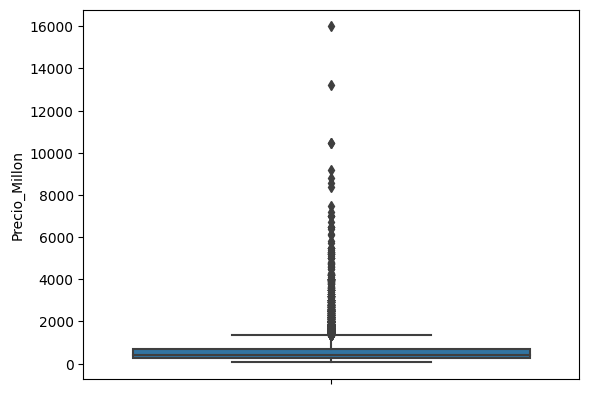

In [146]:
sns.boxplot(data = datos_ml, y = "Precio_Millon")
plt.show()

Observamos una gran presencia de outliers.

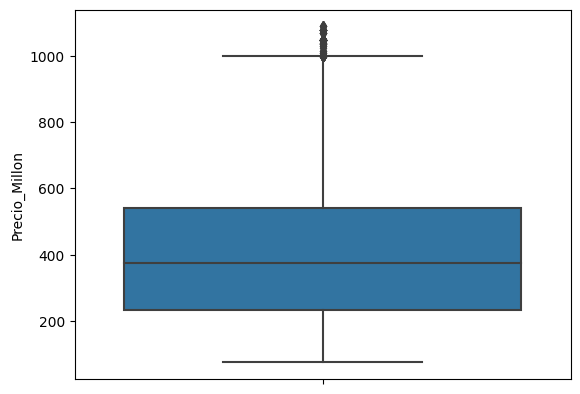

In [147]:
datos_ml = datos_ml.query("Precio_Millon < 1100 & Precio_Millon > 60")
sns.boxplot(data = datos_ml, y = "Precio_Millon")
plt.show()

Eliminando los outliers podemos apreciar mejor la distribución de los precios en millones de pesos colombianos de los inmuebles trabajados.

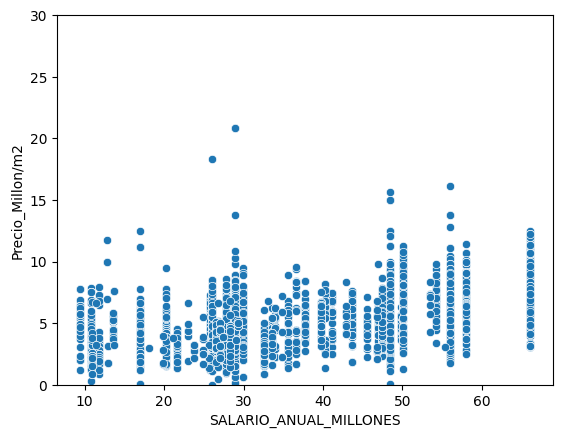

In [148]:
datos_ml["SALARIO_ANUAL_MILLONES"] = datos_ml["SALARIO_MES"]*12/1000000
sns.scatterplot(data = datos_ml, x = "SALARIO_ANUAL_MILLONES", y = "Precio_Millon/m2")
plt.ylim(0,30)
plt.show()

Ahora vemos la dispersión generada a partir de la comparación del salario anual de las personas vs el precio/m2 de las zonas en las que viven, encontrando una baja correlación.

In [149]:
datos_ml.corr()

<ipython-input-149-06e284398928>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()


,Habitaciones,Banos,Area,Precio_Millon,Precio_Millon/m2,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MILLONES
Habitaciones,1.000000,0.437713,0.026071,0.179230,-0.306371,-0.116132,0.131098,0.085410,0.107196,0.142762,0.115573,-0.175285,-0.078045,0.066940,0.130270,0.091745,-0.121339,-0.175285
Banos,0.437713,1.000000,0.038663,0.660255,-0.039856,0.157643,-0.189471,-0.164903,-0.116367,-0.165214,-0.209433,0.174803,0.119425,-0.085039,-0.146668,-0.078096,0.004823,0.174803
Area,0.026071,0.038663,1.000000,0.045738,-0.039372,-0.009015,-0.004434,-0.009447,-0.009534,-0.001416,0.008740,-0.009297,-0.007192,0.017247,0.008387,0.010599,-0.009218,-0.009297
Precio_Millon,0.179230,0.660255,0.045738,1.000000,0.350872,0.325181,-0.376876,-0.285322,-0.236316,-0.349554,-0.384621,0.421757,0.210231,-0.170519,-0.326838,-0.185394,0.158253,0.421757
Precio_Millon/m2,-0.306371,-0.039856,-0.039372,0.350872,1.000000,0.327018,-0.364963,-0.288611,-0.219578,-0.361523,-0.350058,0.455131,0.233120,-0.198799,-0.356976,-0.209247,0.251953,0.455131
CONJUNTO_CERRADO,-0.116132,0.157643,-0.009015,0.325181,0.327018,1.000000,-0.843683,-0.302801,-0.503868,-0.699585,-0.665164,0.808523,0.610917,-0.344403,-0.783094,0.056937,0.084971,0.808523
INSEGURIDAD,0.131098,-0.189471,-0.004434,-0.376876,-0.364963,-0.843683,1.000000,0.512439,0.603769,0.846722,0.746605,-0.816095,-0.560841,0.293174,0.739314,0.085267,0.003191,-0.816095
TERMINALES_BUS,0.085410,-0.164903,-0.009447,-0.285322,-0.288611,-0.302801,0.512439,1.000000,0.397936,0.674859,0.578074,-0.515961,-0.305380,0.173203,0.360473,0.253519,-0.091756,-0.515961
BARES_DISCO,0.107196,-0.116367,-0.009534,-0.236316,-0.219578,-0.503868,0.603769,0.397936,1.000000,0.604147,0.491920,-0.382690,-0.252935,-0.020327,0.322829,-0.054696,0.265425,-0.382690
RUIDO,0.142762,-0.165214,-0.001416,-0.349554,-0.361523,-0.699585,0.846722,0.674859,0.604147,1.000000,0.653949,-0.765385,-0.616666,0.286305,0.670027,0.165022,-0.113742,-0.765385


Ahora vemos el grado de correlación entre variables, siendo 1 el valor de grado de correlación perfecto y 0 un nulo grado de correlación.

<ipython-input-150-33e04b490fd1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


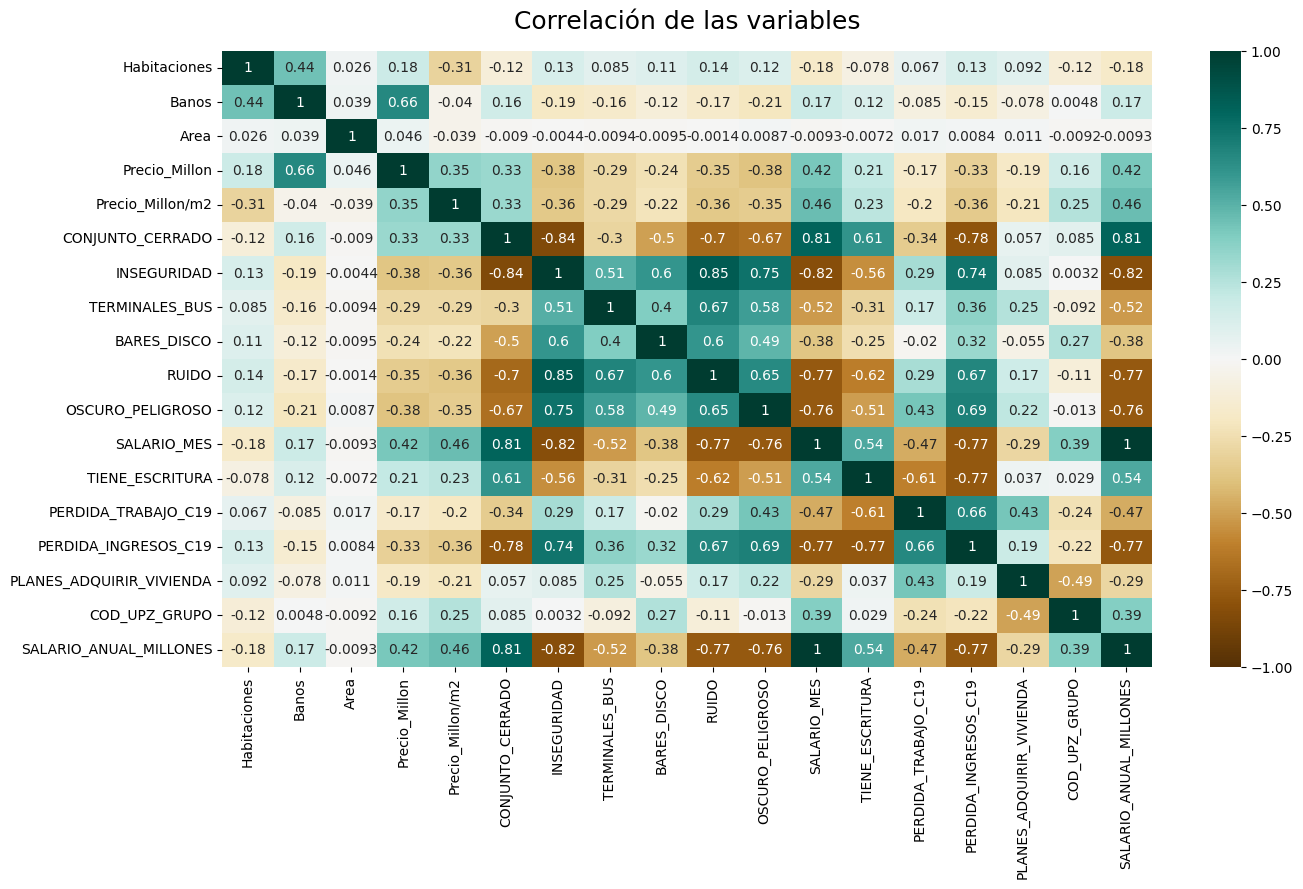

In [150]:
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
plt.figure(figsize = (15,8))
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16)
plt.show()

En este gráfico de calor podemos apreciar de mejor manera el grado de correlación entre variables.

In [151]:
X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml[['Precio_Millon']]
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

Generamos nuestros datos de prueba y test para modelar nuestra base de datos.

In [157]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Creamos un modelo a partir de una regresión lineal a partir de nuestros datos de entrenamiento.

In [153]:
y_predict_test = modelo.predict(X_test)
baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

184.00149510077546

Nuestro modelo genera una variación de 187 millones de pesos colombianos respecto al precio verdadero.

In [154]:
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.019562653824535925

Existe una muy baja correlación entre las variables estudiadas. Esto se debe a que únicamente usamos un parámetro para estimar el precio.

In [156]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos', 'CONJUNTO_CERRADO','SALARIO_ANUAL_MILLONES','TIENE_ESCRITURA']]
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

115.6582617144969 0.5373200188572456
114.7525007159927 0.5361437982845934


Observamos que los valores de error absoluto medio y el coeficiente de determinación mejoraron al considerar más parámetros para generar nuestro modelo.